### Topics to be discussed.
- Mean, Median, Mode and their relationship ==> Skewed Right, symmetric, Skewed Left
- Range, verience, standard deviation
- Normal distribution and standard deviation (1 standard deviation of the mean- 68%, 2 standard deviation 95%, 3 standard deviation 99.7%...)
- Z-score (standard deviation 1, mean = 0, z-score= number of sd)
- Inter quatile range.
- Statistical testing (t-test, one way, two way)
- Correlation
- Hypotheis testing

### Problem 1: Mean, Median, Mode
A retail company wants to analyze the sales data of its top-selling product over the past year to gain insights into customer purchasing behavior. The company has collected daily sales data for this product and wants to understand the central tendency of sales figures. By calculating the mean, median, and mode of the sales data, the company aims to identify patterns, understand typical sales volumes, and detect any skewness or anomalies in the sales distribution. Generate the daily sales data for a year by yourself. Analyze the result.
- use daily_sales.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
daily_sales= pd.read_csv("C:/Users/bisra/Downloads/daily_sales.csv")
daily_sales.head()

,Daily Sales
0,23
1,15
2,21
3,25
4,15


In [3]:
daily_sales.describe()

,Daily Sales
count,365.000000
mean,19.695890
std,4.506175
min,7.000000
25%,17.000000
50%,20.000000
75%,23.000000
max,32.000000


In [4]:
mean=daily_sales.mean()
median=daily_sales.median()
mode= daily_sales["Daily Sales"].mode()
mean, median, mode

(Daily Sales    19.69589
 dtype: float64,
 Daily Sales    20.0
 dtype: float64,
 0    22
 Name: Daily Sales, dtype: int64)

<AxesSubplot:>

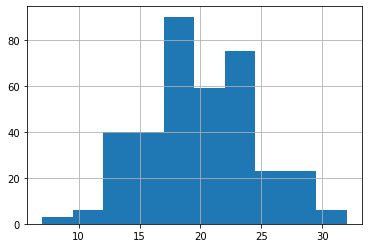

In [5]:
daily_sales['Daily Sales'].hist()

### Problem 2: Data distribution and plots
You are tasked with analyzing the average monthly sales data of a retail store chain over the past year to determine if there has been a significant change in sales compared to the previous year. This analysis will help the store management understand the performance trends and plan future strategies accordingly. Load sales_data.csv.
- find mean sales
- find median sales
- find mode sales
- find skewness
- plot histogram
- density plot

In [6]:
sales_data=pd.read_csv("C:/Users/bisra/Downloads/sales_data.csv")

In [7]:
sales_data['Sales'].mean()

12244.63719635305

In [8]:
sales_data['Sales'].median()

12041.030379195941

In [9]:
sales_data['Sales'].mode()

0      7068.166360
1      9545.928375
2      9690.343445
3     10432.130713
4     11200.471625
5     11231.795506
6     12850.265253
7     12936.213952
8     14362.820521
9     15292.157038
10    15602.673970
11    16722.679598
Name: Sales, dtype: float64

In [10]:
sales_data['Sales'].skew()

-0.07734448027250686

In [11]:
# Thus, negatively skewed

<AxesSubplot:>

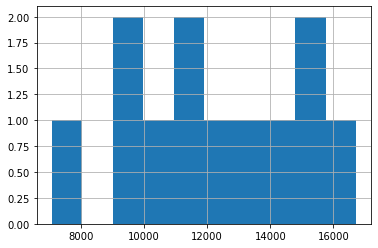

In [12]:
sales_data['Sales'].hist()

C:\Users\bisra\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:ylabel='Density'>

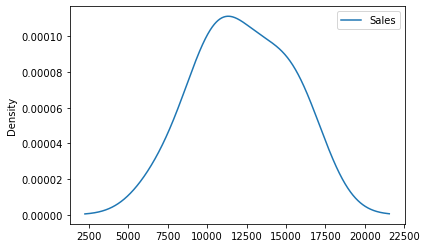

In [13]:
sales_data.plot.density()

### Problem 3: Outlier detection
A university wants to analyze the exam scores of a statistics class to identify any students whose scores are significantly different from the rest. Detecting outliers will help the university provide additional support to struggling students or recognize exceptionally high performers. The university decides to use both the Z-score and the Interquartile Range (IQR) methods to identify these outliers in the exam scores dataset.
- Generate the subject score for full mark 100 for 50 students.

Hints:
- Z-score is greater than 3.
- below - Q1−1.5×IQR or above Q3+1.5×IQR

In [14]:
rng=np.random.default_rng()
marks=rng.poisson(70,50)
marks[0]=1

In [15]:
marks

array([ 1, 74, 52, 72, 67, 66, 64, 81, 69, 60, 73, 66, 65, 67, 81, 67, 72,
       70, 70, 73, 85, 75, 80, 83, 67, 86, 63, 80, 69, 64, 72, 62, 67, 95,
       65, 78, 79, 68, 67, 54, 73, 70, 67, 72, 66, 76, 74, 64, 63, 59],
      dtype=int64)

In [16]:


# Define a z-score threshold of 3 for considering values as outliers
threshold = 3

# Define the z_scores function
def z_scores(x, data):
    print((x - data.mean()) / data.std())
    return ((x - data.mean()) / data.std())


# Calculate z-scores for the entire marks array
z_scores_marks = z_scores(marks, marks)

# Identify outliers
outliers = marks[np.abs(z_scores_marks) > threshold ]



outliers


[-5.39655205e+00  3.91698019e-01 -1.35270611e+00  2.33115825e-01
 -1.63339660e-01 -2.42630756e-01 -4.01212950e-01  9.46735697e-01
 -4.75746581e-03 -7.18377338e-01  3.12406922e-01 -2.42630756e-01
 -3.21921853e-01 -1.63339660e-01  9.46735697e-01 -1.63339660e-01
  2.33115825e-01  7.45336311e-02  7.45336311e-02  3.12406922e-01
  1.26390008e+00  4.70989115e-01  8.67444600e-01  1.10531789e+00
 -1.63339660e-01  1.34319118e+00 -4.80504047e-01  8.67444600e-01
 -4.75746581e-03 -4.01212950e-01  2.33115825e-01 -5.59795144e-01
 -1.63339660e-01  2.05681105e+00 -3.21921853e-01  7.08862406e-01
  7.88153503e-01 -8.40485627e-02 -1.63339660e-01 -1.19412392e+00
  3.12406922e-01  7.45336311e-02 -1.63339660e-01  2.33115825e-01
 -2.42630756e-01  5.50280212e-01  3.91698019e-01 -4.01212950e-01
 -4.80504047e-01 -7.97668435e-01]


array([1], dtype=int64)

In [17]:
q1=np.percentile(marks,25)
q2=np.percentile(marks,50)
q3=np.percentile(marks,75)
q4=np.percentile(marks,100)
q1,q2,q3,q4

(65.25, 69.0, 74.0, 95.0)

In [18]:
IQR=q3-q1
list_index=[]
for i, mark in enumerate(marks):
    if mark<(q1-1.5*IQR) or mark> (q3+1.5*IQR):
        list_index.append(i)
for item in list_index:
    print(marks[item])

1
52
95


### Problem 4: t-test for ML models
Your task is to write Python code to perform t-tests on the testing results of five different machine learning algorithms. First, generate testing results for each of the five models, with each model having results for 50 test sets. Then, using these generated results, conduct t-tests to compare the results of the first model with those of each of the remaining four models. The goal is to determine if there is a statistically significant difference between the performance of the first model and each of the other models. Finally, print the results of each t-test, which will include the t-statistic and p-value for each comparison. And analyze the result whether the methods are statistically significant or not. What does it mean?

In [19]:
model0=np.random.randint(50,high=100,size=50)
model1=np.random.randint(50,high=100,size=50)
model2=np.random.randint(50,high=100,size=50)
model3=np.random.randint(50,high=100,size=50)
model4=np.random.randint(50,high=100,size=50)

In [20]:
len(model0)

50

In [21]:
import numpy as np
from scipy.stats import ttest_ind

# Generate testing results for each model
model0 = np.random.randint(50, high=100, size=50)
model1 = np.random.randint(50, high=100, size=50)
model2 = np.random.randint(50, high=100, size=50)
model3 = np.random.randint(50, high=100, size=50)
model4 = np.random.randint(50, high=100, size=50)

# Function to perform t-test
def t_test(data1, data2):
    t_stat, p_value = ttest_ind(data1, data2)
    return t_stat, p_value

# Conductng t-tests
t_stat1, p_value1 = t_test(model0, model1)
t_stat2, p_value2 = t_test(model0, model2)
t_stat3, p_value3 = t_test(model0, model3)
t_stat4, p_value4 = t_test(model0, model4)

# Print the results of each t-test
print(f"Model 0 vs Model 1: t-statistic = {t_stat1:.4f}, p-value = {p_value1:.4f}")
print(f"Model 0 vs Model 2: t-statistic = {t_stat2:.4f}, p-value = {p_value2:.4f}")
print(f"Model 0 vs Model 3: t-statistic = {t_stat3:.4f}, p-value = {p_value3:.4f}")
print(f"Model 0 vs Model 4: t-statistic = {t_stat4:.4f}, p-value = {p_value4:.4f}")

# Analysis of results
significance_level = 0.05
def analyze_results(p_value, model_num):
    if p_value < significance_level:
        print(f"The difference between Model 0 and Model {model_num} is statistically significant (p-value = {p_value:.4f}).")
    else:
        print(f"The difference between Model 0 and Model {model_num} is not statistically significant (p-value = {p_value:.4f}).")

analyze_results(p_value1, 1)
analyze_results(p_value2, 2)
analyze_results(p_value3, 3)
analyze_results(p_value4, 4)


Model 0 vs Model 1: t-statistic = 1.4793, p-value = 0.1423
Model 0 vs Model 2: t-statistic = 0.7969, p-value = 0.4275
Model 0 vs Model 3: t-statistic = 2.6936, p-value = 0.0083
Model 0 vs Model 4: t-statistic = 1.5248, p-value = 0.1305
The difference between Model 0 and Model 1 is not statistically significant (p-value = 0.1423).
The difference between Model 0 and Model 2 is not statistically significant (p-value = 0.4275).
The difference between Model 0 and Model 3 is statistically significant (p-value = 0.0083).
The difference between Model 0 and Model 4 is not statistically significant (p-value = 0.1305).


### Problem 5: Correlation Analysis
- A coffee shop owner wants to determine whether there is a relationship between the amount of coffee sold and the temperature outside. The owner collects data on the number of cups of coffee sold and the temperature outside for 20 days.
- Download mtcars.csv file and perform the correlation analysis. See the result and analyze it. Also plot the heatmap for it.

In [22]:
import random
temp= [random.randint(0, 35) for i in range(20)]
temp=np.array(temp)
temp

array([33, 35, 14, 33, 29,  6, 32, 23, 29,  9, 31, 35,  4, 16, 35, 21, 22,
       28, 22, 28])

In [23]:
cars_sold = [random.randint(20, 100) for i in range(20)]
cars_sold=np.array(cars_sold)
cars_sold

array([73, 32, 89, 44, 40, 34, 86, 87, 88, 33, 28, 96, 56, 57, 90, 66, 74,
       80, 58, 98])

In [24]:
corr=np.corrcoef(temp,cars_sold)
corr

array([[1.        , 0.27724823],
       [0.27724823, 1.        ]])

In [25]:
type=None
if np.abs(corr[0][1])>0 and np.abs(corr[0][1])<0.3:
    type = "A"
if np.abs(corr[0][1])>0.3 and np.abs(corr[0][1])<0.7:
    type = "B"
if np.abs(corr[0][1])>0.7 and np.abs(corr[0][1])<1:
    type = "C"

corr_type={
    "A" :"No correlation or low correlation",
    "B" : "Moderately Correlated",
    "C": "Highly Correlated"
}


In [26]:
print(f'The correlation coefficient value for the two array is {corr[0][1]}. Thus they can be termed as {corr_type[type]}')

The correlation coefficient value for the two array is 0.2772482319256588. Thus they can be termed as No correlation or low correlation


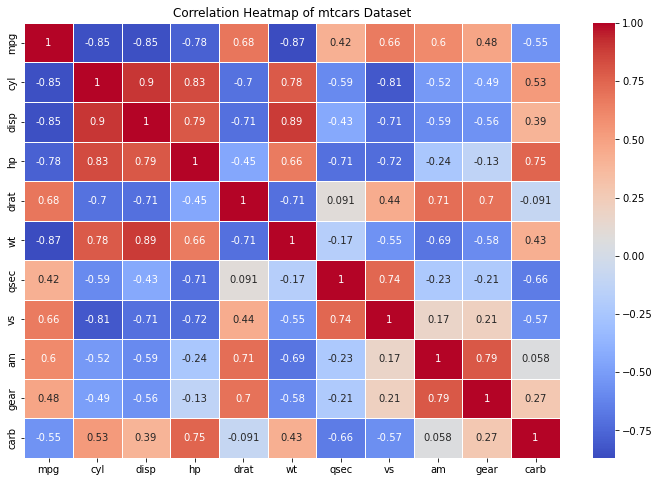

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
mtcars = pd.read_csv("C:/Users/bisra/Downloads/mtcars.csv")

# Perform correlation analysis
correlation_matrix = mtcars.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of mtcars Dataset')
plt.show()


In [28]:
import pandas as pd

correlation_table = pd.DataFrame([
    {'Variable 1': 'mpg', 'Variable 2': 'cyl', 'Correlation Coefficient': correlation_matrix.loc['mpg', 'cyl'], 'Relationship Description': 'More cylinders, lower mpg (fuel efficiency)'},
    {'Variable 1': 'mpg', 'Variable 2': 'disp', 'Correlation Coefficient': correlation_matrix.loc['mpg', 'disp'], 'Relationship Description': 'Higher displacement, lower mpg'},
    {'Variable 1': 'mpg', 'Variable 2': 'hp', 'Correlation Coefficient': correlation_matrix.loc['mpg', 'hp'], 'Relationship Description': 'Higher horsepower, lower mpg'},
    {'Variable 1': 'mpg', 'Variable 2': 'wt', 'Correlation Coefficient': correlation_matrix.loc['mpg', 'wt'], 'Relationship Description': 'Heavier weight, lower mpg'},
    {'Variable 1': 'mpg', 'Variable 2': 'drat', 'Correlation Coefficient': correlation_matrix.loc['mpg', 'drat'], 'Relationship Description': 'Higher rear axle ratio, higher mpg'},
    {'Variable 1': 'mpg', 'Variable 2': 'vs', 'Correlation Coefficient': correlation_matrix.loc['mpg', 'vs'], 'Relationship Description': 'V/S configuration, higher mpg'},
    {'Variable 1': 'cyl', 'Variable 2': 'disp', 'Correlation Coefficient': correlation_matrix.loc['cyl', 'disp'], 'Relationship Description': 'More cylinders, higher displacement'},
    {'Variable 1': 'cyl', 'Variable 2': 'hp', 'Correlation Coefficient': correlation_matrix.loc['cyl', 'hp'], 'Relationship Description': 'More cylinders, higher horsepower'},
    {'Variable 1': 'cyl', 'Variable 2': 'drat', 'Correlation Coefficient': correlation_matrix.loc['cyl', 'drat'], 'Relationship Description': 'More cylinders, lower rear axle ratio'},
    {'Variable 1': 'cyl', 'Variable 2': 'vs', 'Correlation Coefficient': correlation_matrix.loc['cyl', 'vs'], 'Relationship Description': 'More cylinders, less likely V/S configuration'},
    {'Variable 1': 'disp', 'Variable 2': 'wt', 'Correlation Coefficient': correlation_matrix.loc['disp', 'wt'], 'Relationship Description': 'Higher displacement, heavier weight'},
    {'Variable 1': 'disp', 'Variable 2': 'qsec', 'Correlation Coefficient': correlation_matrix.loc['disp', 'qsec'], 'Relationship Description': 'Higher displacement, lower quarter-mile time'}
])

# Display the correlation table
print(correlation_table)


   Variable 1 Variable 2  Correlation Coefficient  \
0         mpg        cyl                -0.852162   
1         mpg       disp                -0.847551   
2         mpg         hp                -0.776168   
3         mpg         wt                -0.867659   
4         mpg       drat                 0.681172   
5         mpg         vs                 0.664039   
6         cyl       disp                 0.902033   
7         cyl         hp                 0.832447   
8         cyl       drat                -0.699938   
9         cyl         vs                -0.810812   
10       disp         wt                 0.887980   
11       disp       qsec                -0.433698   

                         Relationship Description  
0     More cylinders, lower mpg (fuel efficiency)  
1                  Higher displacement, lower mpg  
2                    Higher horsepower, lower mpg  
3                       Heavier weight, lower mpg  
4              Higher rear axle ratio, higher mpg 


## Analysis: 
#### - MPG (Miles per Gallon) is Positively correlated with drat (0.68) and vs (0.66), indicating that cars with a higher rear axle ratio and V/S configuration tend to have better fuel efficiency.
#### - Cylinders (cyl) is Positively correlated with disp (0.90) and hp (0.83), suggesting that cars with more cylinders typically have larger engines and higher horsepower.


### Problem 6: Hypothesis testing
Imagine a company, samsung, that manufactures a popular smartphone. They have introduced a new battery designed to last longer than the previous model, which had an average battery life of 10 hours. To determine if the new battery indeed lasts longer, samsung conducts a study where they test 30 smartphones with the new battery and record their battery life. The goal is to test the hypothesis that the mean battery life of the new batteries is greater than 10 hours using a one-tailed test.

In [29]:
'''
Null: mean =10
Alternate : mean>10

'''

'\nNull: mean =10\nAlternate : mean>10\n\n'

In [30]:
import numpy as np
from scipy import stats

# Sample data: battery life of 30 smartphones
battery_life = [10.5, 11.0, 9.8, 10.7, 11.2, 10.3, 10.9, 11.1, 10.4, 11.5,
                10.6, 10.8, 10.2, 11.3, 10.0, 10.1, 11.4, 10.5, 10.9, 10.7,
                10.6, 11.0, 10.3, 10.8, 10.9, 11.2, 10.5, 11.1, 10.7, 11.3]

# Population mean under null hypothesis
mu_0 = 10

# Sample mean and standard deviation
sample_mean = np.mean(battery_life)
sample_std = np.std(battery_life, ddof=1)
n = len(battery_life)

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(battery_life, mu_0)

'''
The scipy.stats.ttest_1samp function by default performs a two-tailed test, which tests for any significant difference from the population mean (either greater than or less than). However, our hypothesis is one-tailed because we are only interested in whether the mean battery life is greater than 10 hours.

To convert the two-tailed p-value to a one-tailed p-value, we need to divide the two-tailed p-value by 2.
'''
# Since this is a one-tailed test (greater than), here I divide the p-value by 2
p_value_one_tailed = p_value / 2

# Display the results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"t-statistic: {t_stat}")
print(f"p-value (one-tailed): {p_value_one_tailed}")

# Determine if we reject the null hypothesis
alpha = 0.05
if p_value_one_tailed < alpha and t_stat > 0:
    print("Reject the null hypothesis: The new battery lasts longer than 10 hours.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say the new battery lasts longer than 10 hours.")


Sample Mean: 10.743333333333334
Sample Standard Deviation: 0.43126384702073783
t-statistic: 9.440634479907983
p-value (one-tailed): 1.198036584163666e-10
Reject the null hypothesis: The new battery lasts longer than 10 hours.


In [33]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import f_oneway

# Create my own hypothetical dataset
data = {
    'BloodType': ['A', 'B', 'A', 'O', 'AB', 'O', 'B', 'A', 'O', 'AB', 'A', 'B', 'O', 'AB', 'O'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female']
}

df = pd.DataFrame(data)

# Frequency Table
frequency_table = df['BloodType'].value_counts()
print("Frequency Table:\n", frequency_table)

# Value Count of Blood Type
blood_type_counts = df['BloodType'].value_counts()
print("\nValue Count of Blood Type:\n", blood_type_counts)

# Value Count of Gender
gender_counts = df['Gender'].value_counts()
print("\nValue Count of Gender:\n", gender_counts)

# Value Count as Proportions
blood_type_proportions = df['BloodType'].value_counts(normalize=True)
gender_proportions = df['Gender'].value_counts(normalize=True)
print("\nValue Count of Blood Type as Proportions:\n", blood_type_proportions)
print("\nValue Count of Gender as Proportions:\n", gender_proportions)

# Cross Table
cross_table = pd.crosstab(df['BloodType'], df['Gender'])
print("\nCross Table:\n", cross_table)

# Cros Table with Margins
cross_table_with_margins = pd.crosstab(df['BloodType'], df['Gender'], margins=True)
print("\nCross Table with Margins:\n", cross_table_with_margins)

# Function to calculate the confidence interval
def confidence_interval(n, x, confidence=0.95):
    p_hat = x / n
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    margin_of_error = z * (p_hat * (1 - p_hat) / n)**0.5
    return (p_hat - margin_of_error, p_hat + margin_of_error)

# Scenario 1: 100 surveyed, 55 positive
ci_100 = confidence_interval(100, 55)
print("\n95% Confidence Interval for 100 surveyed:", ci_100)

# Scenario 2: 1000 surveyed, 550 positive
ci_1000 = confidence_interval(1000, 550)
print("95% Confidence Interval for 1000 surveyed:", ci_1000)

# Test scores for three groups
x1 = np.array([82, 93, 61, 74, 69, 70, 53])
x2 = np.array([71, 62, 85, 94, 78, 66, 71])
x3 = np.array([90, 88, 77, 85, 95, 80, 79])

# Perform ANOVA
anova_result = f_oneway(x1, x2, x3)
print("\nANOVA Result:", anova_result)


Frequency Table:
 O     5
A     4
B     3
AB    3
Name: BloodType, dtype: int64

Value Count of Blood Type:
 O     5
A     4
B     3
AB    3
Name: BloodType, dtype: int64

Value Count of Gender:
 Female    8
Male      7
Name: Gender, dtype: int64

Value Count of Blood Type as Proportions:
 O     0.333333
A     0.266667
B     0.200000
AB    0.200000
Name: BloodType, dtype: float64

Value Count of Gender as Proportions:
 Female    0.533333
Male      0.466667
Name: Gender, dtype: float64

Cross Table:
 Gender     Female  Male
BloodType              
A               1     3
AB              1     2
B               3     0
O               3     2

Cross Table with Margins:
 Gender     Female  Male  All
BloodType                   
A               1     3    4
AB              1     2    3
B               3     0    3
O               3     2    5
All             8     7   15

95% Confidence Interval for 100 surveyed: (0.45249302291006066, 0.6475069770899394)
95% Confidence Interval for 1000 su